
Results for variable: MACQ_CC_EFR02.aal
Threshold: 50.00
Reliability: 53.8%
Resilience: 50.0%


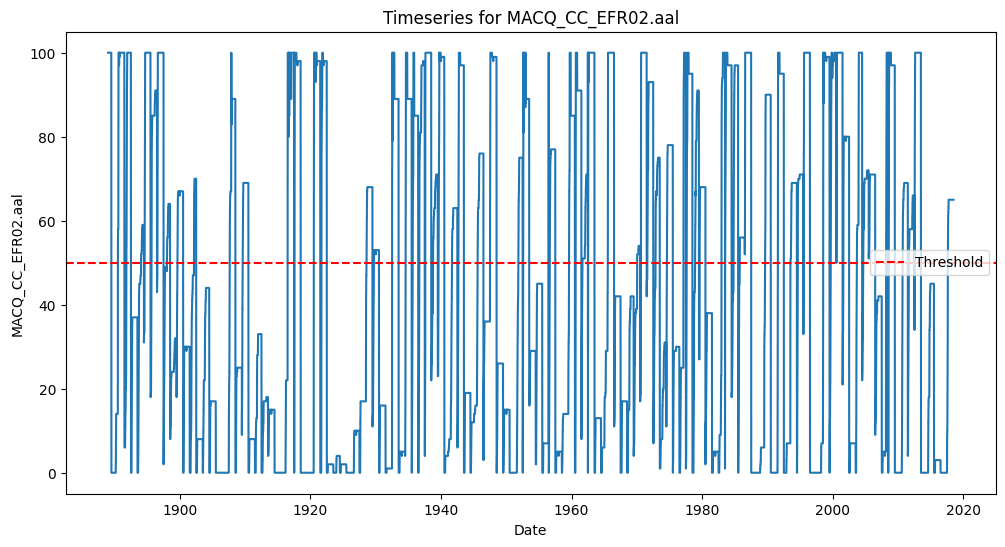

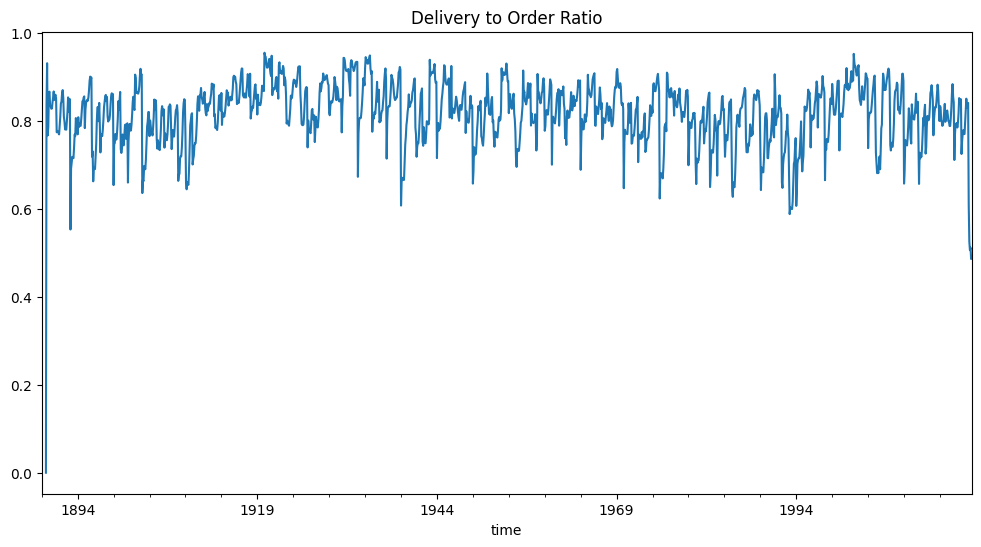

In [17]:
from werp_package.data_reader import NetCDFReader
from werp_package.metrics import ResilienceMetrics, DeliberyToOrderRatio
from pathlib import Path
import matplotlib.pyplot as plt

def run_resilience_metrics(base_path, variable_name, threshold):
    """
    Run demonstration analysis on a specific variable.
    
    Parameters
    ----------
    file_path : str
        Path to the NetCDF file
    variable_name : str
        Name of the variable to analyze
    threshold : float
        Threshold value for resilience calculations
    """
    # Initialize the reader
    file_path = Path(base_path) / 'allocations.nc'
    reader = NetCDFReader(file_path)
    
    # Get timeseries
    timeseries = reader.get_timeseries(variable_name)
    
    # Calculate metrics
    metrics = ResilienceMetrics(timeseries, threshold)
    reliability = metrics.calculate_reliability()
    resilience = metrics.calculate_resilience()
    
    # Print results
    print(f"\nResults for variable: {variable_name}")
    print(f"Threshold: {threshold:.2f}")
    print(f"Reliability: {reliability:.1f}%")
    print(f"Resilience: {resilience:.1f}%")
    
    # Optional: Plot the timeseries
    plt.figure(figsize=(12, 6))
    timeseries.plot()
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.title(f'Timeseries for {variable_name}')
    plt.legend()
    plt.show()

def run_del_to_order_ratio(base_path):
    """
    Calculate and display the Delivery to Order Ratio for specified nodes.
    
    Parameters
    ----------
    file_path : str
        Path to the NetCDF file for irrigation demand
    nodes : list
        List of node IDs to include in the calculation
    """
    irrigation_file_path = Path(base_path) / 'Irrigation Demand.nc'
    NODES_8_2 = [209, 222, 233, 245, 826, 373, 836, 326, 57,
                374, 375, 376, 848, 377, 336, 313, 350, 337]
    reader = NetCDFReader(irrigation_file_path)
    df = reader.get_timeseries(['On Alloc div.', 'Orders']).sel(node=NODES_8_2).sum(dim='node').to_dataframe()
    del_to_order_ratio = DeliberyToOrderRatio(df)
    ratio = del_to_order_ratio.cal_del_to_order_ratio()
    plt.figure(figsize=(12, 6))
    ratio.plot()
    plt.title('Delivery to Order Ratio')

if __name__ == '__main__':
    # Example usage for resilience metrics
    #bp = Path('P:/work/sho108/werp/results/result_jul2024/stochastic/MACQ_CC_EFR/licvolfactor_1_0/r1_0_e1_0/0')
    import werp_package
    bp = Path(werp_package.__file__).parent.parent/'data'
    variable_name = 'MACQ_CC_EFR02.aal'  # Example variable
    threshold = 50  # Set appropriate threshold
    run_resilience_metrics(bp, variable_name, threshold) 
    run_del_to_order_ratio(bp)


<Axes: xlabel='time'>

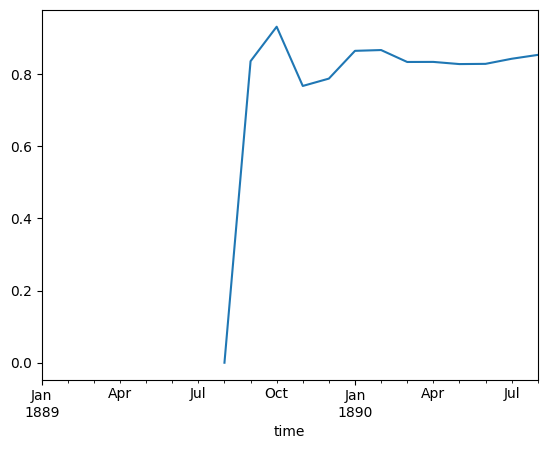